In [1]:
# Data
import numpy  as np
import pandas as pd

# Graphs
import matplotlib.pyplot   as plt
import matplotlib.colors   as clr
from   matplotlib          import cm
import seaborn             as sns; sns.set_style('ticks')
from   matplotlib.gridspec import GridSpec
import matplotlib.colors   as MplColors

In [9]:
# The final catalogue, used to make plots
A1644 = pd.read_csv('ALL_Spec_Only_V7_Aper6_CCM89.csv')

# A catalogue containing IDs, RAs, and DECs. Used to plot the footprint
Abell_Data = pd.read_csv('Fields/Hydra.csv')

/tmp/ipykernel_208905/739316445.py:2: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  A1644 = pd.read_csv('ALL_Spec_Only_V7_Aper6_CCM89.csv')


In [7]:
# Calculate the distance between all objects and the center coordinates
RA_center  = 159.17
DEC_center = -27.524

radius = 1.5744

Distances_A1644 = np.sqrt((np.sum(([RA_Center, DEC_Center] - A1644[['RA', 'DEC']].values)**2,   axis=1)))

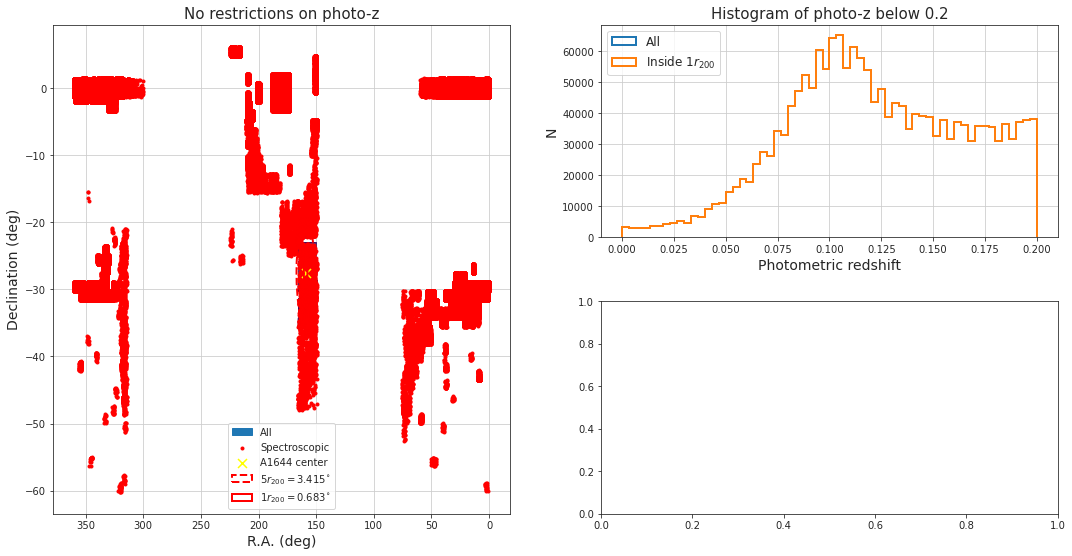

In [15]:
fig = plt.figure(figsize=(18, 9))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

gs = GridSpec(2, 2, figure=fig)

#######################################################################
# Hexbin plot of the coordinates
#######################################################################
ax_hex = fig.add_subplot(gs[0:2, 0:1])

# Plot all objects
plt.hexbin(Abell_Data['RA'], Abell_Data['DEC'], cmap='viridis', mincnt=1, label='All')

# Plot only those with spec-zs
#Cond = (A1644['zflg'] == 'spec')
#ax_hex.scatter(A1644['RA'][Cond], A1644['DEC'][Cond], color='red', s=3**2, label='Spectroscopic')
ax_hex.scatter(A1644['RA'], A1644['DEC'], color='red', s=3**2, label='Spectroscopic')

# Plot center of cluster
ax_hex.scatter(RA_center, DEC_center, marker='x', s=9**2, color='yellow', label='A1644 center')

# Labels
ax_hex.set_xlabel('R.A. (deg)', size=14)
ax_hex.set_ylabel('Declination (deg)', size=14)

# Circles
FiveR200 = plt.Circle((RA_center, DEC_center), 5*radius, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 3.415^{\circ}$')
ax_hex.add_patch(FiveR200)

OneR200 = plt.Circle((RA_center, DEC_center), radius, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 0.683^{\circ}$')
ax_hex.add_patch(OneR200)

# Plot footprint
# for field in Abell_Data['ID'].str[7:-13].unique():
#     Cond = Abell_Data['ID'].str.contains(field)
#     ax_hex.plot([np.min(Abell_Data[Cond]['RA']), np.max(Abell_Data[Cond]['RA'])], 
#              [np.min(Abell_Data[Cond]['DEC']), np.min(Abell_Data[Cond]['DEC'])], color='white', alpha=0.5)
#     ax_hex.plot([np.max(Abell_Data[Cond]['RA']), np.min(Abell_Data[Cond]['RA'])], 
#              [np.max(Abell_Data[Cond]['DEC']), np.max(Abell_Data[Cond]['DEC'])], color='white', alpha=0.5)
#     ax_hex.plot([np.min(Abell_Data[Cond]['RA']), np.min(Abell_Data[Cond]['RA'])], 
#              [np.min(Abell_Data[Cond]['DEC']), np.max(Abell_Data[Cond]['DEC'])], color='white', alpha=0.5)
#     ax_hex.plot([np.max(Abell_Data[Cond]['RA']), np.max(Abell_Data[Cond]['RA'])], 
#              [np.min(Abell_Data[Cond]['DEC']), np.max(Abell_Data[Cond]['DEC'])], color='white', alpha=0.5)

# Title
ax_hex.set_title('No restrictions on photo-z', size=15)
    
ax_hex.legend()
ax_hex.grid()

# Invert RA axis
ax_hex.invert_xaxis()

#######################################################################
# Histogram of redshifts
#######################################################################
ax_hist = fig.add_subplot(gs[0, 1])

# Histogram of all redshifts
ax_hist.hist(Abell_Data['zml'], density=False, bins=60, histtype='step', lw=2, range=(0, 0.2), label='All')

# Histogram of redshifts for the objects inside 1r200
Cond = (Distances_A1644 <= 0.683)
ax_hist.hist(Abell_Data['zml'], density=False, bins=60, histtype='step', lw=2, range=(0, 0.2), label='Inside $1r_{200}$')

ax_hist.set_title('Histogram of photo-z below 0.2', size=15)
ax_hist.set_xlabel('Photometric redshift', size=14)
ax_hist.set_ylabel('N', size=14)

ax_hist.legend(loc='upper left', fontsize=12)
ax_hist.grid()

#######################################################################
# Photometric vs spectroscopic redshift plot
#######################################################################
ax_scatter = fig.add_subplot(gs[1, 1])

#Cond = (A1644['z_flag'] == 'spec')
# ax_scatter.hexbin(A1644['z'], Abell_Data['zml'], bins='log', mincnt=1, gridsize=(120, 60), cmap='viridis', extent=(0, 0.2, 0, 0.2))
# ax_scatter.plot([0, 0.2], [0, 0.2], '--', color='red', label='Ideal')
# ax_scatter.set_xlabel('Spectroscopic redshift', size=14)
# ax_scatter.set_ylabel('Photometric redshift', size=14)
# ax_scatter.grid()
# ax_scatter.legend(fontsize=12)

plt.savefig('A1644_Plots_1.png', dpi=100, bbox_inches='tight')
plt.show()

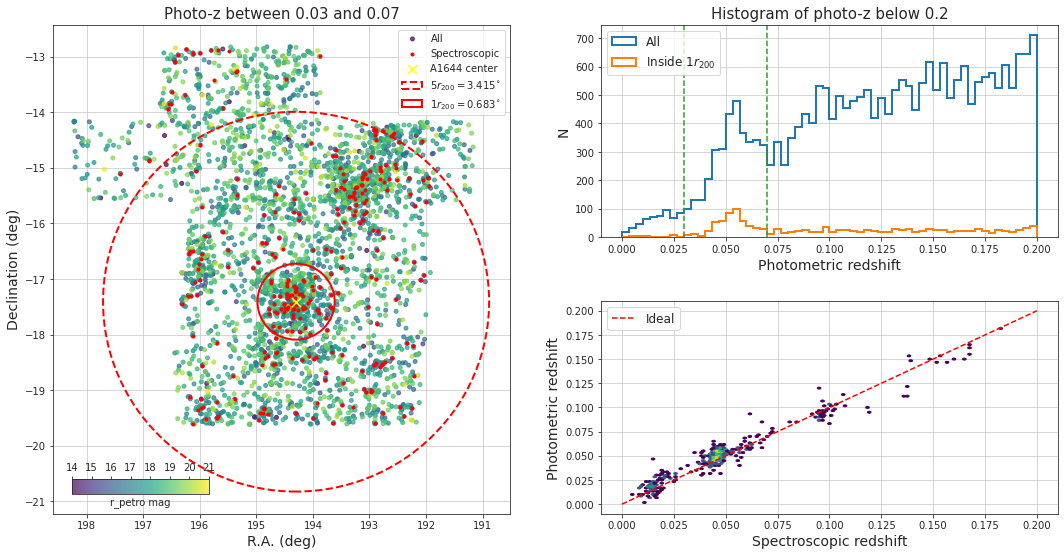

In [22]:
fig = plt.figure(figsize=(18, 9))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

gs = GridSpec(2, 2, figure=fig)

#######################################################################
ax_hex = fig.add_subplot(gs[0:2, 0:1])

# Plot all objects with redshift between 0.03 and 0.07 (this is photo or
# spec redshift)
Cond  = A1644['zml'].between(0.03, 0.07)
scatt = ax_hex.scatter(A1644['RA'][Cond], A1644['DEC'][Cond], c=A1644['r_PETRO'][Cond], s=4**2, label='All', alpha=0.7, vmin=14, vmax=21, cmap='viridis')
#scatt = ax_hex.scatter(A1644['RA'][Cond], A1644['DEC'][Cond], s=4**2, label='All', alpha=0.7) -> without color

# Plot only those with spectroscopic redshift
Cond = (A1644['z_flag'] == 'spec') & (A1644['z'].between(0.03, 0.07))
ax_hex.scatter(A1644['RA'][Cond], A1644['DEC'][Cond], color='red', s=3**2, label='Spectroscopic')

# Plot center of cluster
ax_hex.scatter(194.2986, -17.409, marker='x', s=9**2, color='yellow', label='A1644 center')

# Labels
ax_hex.set_xlabel('R.A. (deg)', size=14)
ax_hex.set_ylabel('Declination (deg)', size=14)

# Circles
FiveR200 = plt.Circle((194.2986, -17.409), 3.415, linestyle='--', edgecolor='red', facecolor="None", lw=2, label=r'$5 r_{200} = 3.415^{\circ}$')
ax_hex.add_patch(FiveR200)

OneR200 = plt.Circle((194.2986, -17.409), 3.415/5, linestyle='-', edgecolor='red', facecolor="None", lw=2, label=r'$1 r_{200} = 0.683^{\circ}$')
ax_hex.add_patch(OneR200)

ax_hex.set_title(r'Photo-z between 0.03 and 0.07', size=15)

ax_hex.legend()
ax_hex.grid()

ax_hex.invert_xaxis()

# Add a magnitude colorbar inside plot
# https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax_hex, width="30%", height="3%", loc=3, bbox_to_anchor=(0.03, 0.03, 1, 1), bbox_transform=ax_hex.transAxes) 
plt.colorbar(scatt, cax=cbaxes, ticks=[14, 15, 16, 17, 18, 19, 20, 21], orientation='horizontal')
cbaxes.xaxis.set_ticks_position('top')
cbaxes.set_xlabel('r_petro mag')

#######################################################################
ax_hist = fig.add_subplot(gs[0, 1])

# Histogram of all redshifts
ax_hist.hist(A1644['zml'], density=False, bins=60, histtype='step', lw=2, range=(0, 0.2), label='All')

# Histogram of redshifts for the objects inside 1r200
Cond = (Distances_A1644 <= 0.683)
ax_hist.hist(A1644['zml'][Cond], density=False, bins=60, histtype='step', lw=2, range=(0, 0.2), label='Inside $1r_{200}$')

# Vertical lines
ax_hist.axvline(0.03, linestyle='--', color='C2')
ax_hist.axvline(0.07, linestyle='--', color='C2')

ax_hist.set_title('Histogram of photo-z below 0.2', size=15)
ax_hist.set_xlabel('Photometric redshift', size=14)
ax_hist.set_ylabel('N', size=14)

ax_hist.legend(loc='upper left', fontsize=12)
ax_hist.grid()

#######################################################################
# Photometric vs spectroscopic redshift plot
#######################################################################
ax_scatter = fig.add_subplot(gs[1, 1])

Cond = (A1644['z_flag'] == 'spec')
ax_scatter.hexbin(A1644['z'][Cond], A1644['zml'][Cond], bins='log', mincnt=1, gridsize=(120, 60), cmap='viridis', extent=(0, 0.2, 0, 0.2))
ax_scatter.plot([0, 0.2], [0, 0.2], '--', color='red', label='Ideal')

ax_scatter.set_xlabel('Spectroscopic redshift', size=14)
ax_scatter.set_ylabel('Photometric redshift', size=14)

ax_scatter.legend(fontsize=12)
ax_scatter.grid()

plt.savefig('A1644_Plots_2.png', dpi=100, bbox_inches='tight')
plt.show()